Import the Required Librairies and Framework

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, date
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler

Tasks to
be performed:

The following tasks are to be performed:

Note:

Please
complete
the given steps on both train and test data.

•
Read the Data from
the Given excel file.

•
Check the data type
for both data (test file and train file)

•
Do missing value analysis and drop
columns
where mo
re than 25%
of data are
missing

•
Extracting Day, Month,and Year from Date received Column and create new fields for a month, year,and day

•
Calculat
e
the Number of
Days the Complaint was with the Company
and create a new
field as “
Days held”

•
Drop "Date received","Date Sent to Company","ZIP Code", "Complaint ID"
fields

•
Imputing Null
value
in
“
State
”
by Mode

•
with the help
of
the days we calculated above
,
create a new
field
'Week_received'
where
we
calculate the week based on the day of receiving.

•
store data of disputed people into the “
disputed_cons
” variable for future tasks

•
Plot
bar graph
of
the
total no of disputes
of consumers
with the help of
seaborn

•
Plot
bar
graph of the
total no of disputes products
-
wise
with the help of
seaborn

•
Plot
bar graph of
the total no of disputes with Top Issues by Highest Disputes,
with the
help of
seaborn

•
Plot
bar graph of
the total no of disputes by State with Maximum Disputes

•
Plot
bar graph of
the total no of disputes Submitted Via
different
source

•
Plot
bar graph of
the total no of disputes where
the
Company's Response to the
Complaints

•
Plot
bar graph of
the total no of disputes where
the
Company's Response
Leads
to
Disputes

•
Plot
b
ar graph of
the total no of disputes
.
Whether there are Disputes Instead of Timely
Response

•
Plot
bar graph of
the total no of disputes over Year Wise Complaints

•
Plot
bar graph of
the total no of disputes over Year Wise Disputes

•
Plot
bar graph of
Top
Companies with Highest Complaints

•
Convert all negative days held to zero(it is the time taken by the authority that can't be negative)

•
Drop
Unnecessary
Columns for the Model Building
like:'Company', 'State', 'Year_Received', 'Days_held'

•
Change Consumer Disputed Column to 0 and 1(yes to 1, and no to 0)

•
Create Dummy Variables for
categorical
features
and concat with
the
original data frame
like: 'Product
,’
'Submitted via
,’
'Company response to consumer
,’
'Timely response?'

•
Scaling the Data Sets (note:
discard dependent variable before doing standardization)
and
Make
feature Selection
with the help of
PCA
up to 80% of the information.

•
Splitting
the Data Sets Into X and Y by
the
dependent and independent
variables
(data
selected by PCA)

•
Build given models and
measure
their test and
validation
accuracy
:

o
LogisticRegression

o
DecisionTreeClassifier

o
RandomForestClassifier

o
AdaBoostClassifier

o
GradientBoostingClassifier

o
KNeighborsClassifier

o
XGBClassifier


•
Whoever gives the most accurate result uses it and predicts the
outcome
for the test file
and fills its dispute column so the business team can take some action accordingly

In [ ]:
#Read the Data from the Given csv file.
Train_Data=pd.read_csv("/content/Consumer_Complaints_train.csv")
Test_Data=pd.read_csv("/content/Consumer_Complaints_test.csv")

In [ ]:
# Display the first Five Records
Train_Data.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2015-10-14,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,NaN,Equifax,GA,30134,NaN,Consent not provided,Web,2015-10-14,Closed with explanation,Yes,No,1605653.0
1,2015-04-26,Bank account or service,Other bank product/service,Deposits and withdrawals,NaN,RE : XXXX XXXX XXXX-PRIVILEGED AND CONFIDENTIA...,NaN,Wells Fargo & Company,GA,319XX,NaN,Consent provided,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613.0
2,2013-12-20,Credit card,NaN,Other,NaN,NaN,NaN,Citibank,SC,29203,NaN,NaN,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394.0
3,2016-03-03,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,NaN,Company has responded to the consumer and the ...,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,NaN,NaN,Referral,2016-03-04,Closed with explanation,Yes,No,1815134.0
4,2015-01-30,Debt collection,Medical,Disclosure verification of debt,Not given enough info to verify debt,NaN,NaN,"HCFS Health Care Financial Services, Inc.",CA,90036,NaN,NaN,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613.0


In [ ]:
Test_Data.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID
0,2015-01-17,Credit card,NaN,Customer service / Customer relations,NaN,NaN,NaN,Citibank,TX,75241,NaN,NaN,Web,2015-01-17,Closed with monetary relief,Yes,1198133.0
1,2016-06-22,Consumer Loan,Title loan,Payment to acct not credited,NaN,NaN,Company believes it acted appropriately as aut...,"Larsen MacColl Partners II, L.P.",TX,76548,Servicemember,NaN,Phone,2016-06-22,Closed with explanation,Yes,1979989.0
2,2015-09-04,Credit card,NaN,Credit line increase/decrease,NaN,I WANT TO REQUEST A CREDIT LINE INCREASE OF XX...,NaN,Capital One,NC,271XX,NaN,Consent provided,Web,2015-09-04,Closed with explanation,Yes,1552090.0
3,2016-05-17,Consumer Loan,Installment loan,Problems when you are unable to pay,NaN,I have asked One Main Financial not to call my...,NaN,"OneMain Financial Holdings, LLC",MO,634XX,NaN,Consent provided,Web,2016-05-20,Closed with non-monetary relief,Yes,1929306.0
4,2016-07-07,Debt collection,"Other (i.e. phone, health club, etc.)",Improper contact or sharing of info,Contacted employer after asked not to,I have received several calls from a XXXX XXXX...,Company has responded to the consumer and the ...,"GMA Investments, LLC",SC,296XX,NaN,Consent provided,Web,2016-07-07,Closed with explanation,Yes,2001667.0


In [ ]:
# Dispaly the shape of Dataset for the both dataset
print("Shape of Train  Data",Train_Data.shape)
print("Shape of Test Data",Test_Data.shape)

Shape of Train  Data (8478, 18)
Shape of Test Data (61260, 17)


In [ ]:
# Check data types of train data
print("Train Data Type")
print(Train_Data.dtypes)

Train Data Type
Date received                    object
Product                          object
Sub-product                      object
Issue                            object
Sub-issue                        object
Consumer complaint narrative     object
Company public response          object
Company                          object
State                            object
ZIP code                         object
Tags                             object
Consumer consent provided?       object
Submitted via                    object
Date sent to company             object
Company response to consumer     object
Timely response?                 object
Consumer disputed?               object
Complaint ID                    float64
dtype: object


In [ ]:
# Check data types of test data
print("Test Data Type")
print(Test_Data.dtypes)

Test Data Type
Date received                    object
Product                          object
Sub-product                      object
Issue                            object
Sub-issue                        object
Consumer complaint narrative     object
Company public response          object
Company                          object
State                            object
ZIP code                         object
Tags                             object
Consumer consent provided?       object
Submitted via                    object
Date sent to company             object
Company response to consumer     object
Timely response?                 object
Complaint ID                    float64
dtype: object


In [ ]:
# Do missing value analysis and drop columns where more than 25% of data are missing
# Calculate percentage of missing values in train data
missing_percentage_train = (Train_Data.isnull().sum() / len(Train_Data)) * 100
# Drop columns with more than 25% missing values in train data
Train_Data.drop(columns=missing_percentage_train[missing_percentage_train > 25].index, inplace=True)
# Calculate percentage of missing values in test data
missing_percentage_test = (Test_Data.isnull().sum() / len(Test_Data)) * 100
# Drop columns with more than 25% missing values in test data
Test_Data.drop(columns=missing_percentage_test[missing_percentage_test > 25].index, inplace=True)

In [ ]:
Train_Data['Date received'] = pd.to_datetime(Train_Data['Date received'])
Test_Data['Date received'] = pd.to_datetime(Test_Data['Date received'])

In [ ]:
# Extract day, month, and year from Date received column in train data
Train_Data['Day'] = Train_Data['Date received'].dt.day
Train_Data['Month'] = Train_Data['Date received'].dt.month
Train_Data['Year'] = Train_Data['Date received'].dt.year
# Extract day, month, and year from Date received column in test data
Test_Data['Day'] = Test_Data['Date received'].dt.day
Test_Data['Month'] = Test_Data['Date received'].dt.month
Test_Data['Year'] = Test_Data['Date received'].dt.year

In [ ]:
Train_Data.columns

Index(['Date received', 'Product', 'Issue', 'Company', 'State', 'ZIP code',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID', 'Day',
       'Month', 'Year'],
      dtype='object')

In [ ]:
# Calculate the number of days the complaint was with the company in train data
Train_Data['Date sent to company']=pd.to_datetime(Train_Data['Date sent to company'])
Test_Data['Date sent to company'] = pd.to_datetime(Test_Data['Date sent to company'])
Train_Data['Days Held'] = (Train_Data['Date sent to company'] - Train_Data['Date received']).dt.days
# Calculate the number of days the complaint was with the company in test data
Test_Data['Date sent to company'] = pd.to_datetime(Test_Data['Date sent to company'])
Test_Data['Days Held'] = (Test_Data['Date sent to company'] - Test_Data['Date received']).dt.days

In [ ]:
# Drop columns in train data
Train_Data.drop(columns=['Date received', 'Date sent to company', 'ZIP code', 'Complaint ID'], inplace=True)
# Drop columns in test data
Test_Data.drop(columns=['Date received', 'Date sent to company', 'ZIP code', 'Complaint ID'], inplace=True)


In [ ]:
#Imputing Null value in “State” by Mode
Train_Data['State'].fillna(Train_Data['State'].mode()[0], inplace=True)
Test_Data['State'].fillna(Test_Data['State'].mode()[0], inplace=True)

In [ ]:
# With the help of the days we calculated above , create a new field 'Week_received' where we calculate the week based on the day of receiving.
Train_Data['Day']=pd.to_datetime(Train_Data['Day'])
Test_Data['Day'] = pd.to_datetime(Test_Data['Day'])
Train_Data['Week_Received'] = Train_Data['Day'].dt.week
Test_Data['Week_Received'] = Test_Data['Day'].dt.week

<ipython-input-331-0873e5ac0e5d>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  Train_Data['Week_Received'] = Train_Data['Day'].dt.week
<ipython-input-331-0873e5ac0e5d>:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  Test_Data['Week_Received'] = Test_Data['Day'].dt.week


In [ ]:
Test_Data.columns

Index(['Product', 'Issue', 'Company', 'State', 'Submitted via',
       'Company response to consumer', 'Timely response?', 'Day', 'Month',
       'Year', 'Days Held', 'Week_Received'],
      dtype='object')

In [ ]:
#store data of disputed people into the “ disputed_cons ” variable for future tasks
Disputed_cons_Train = Train_Data[Train_Data['Consumer disputed?'] == 'yes']

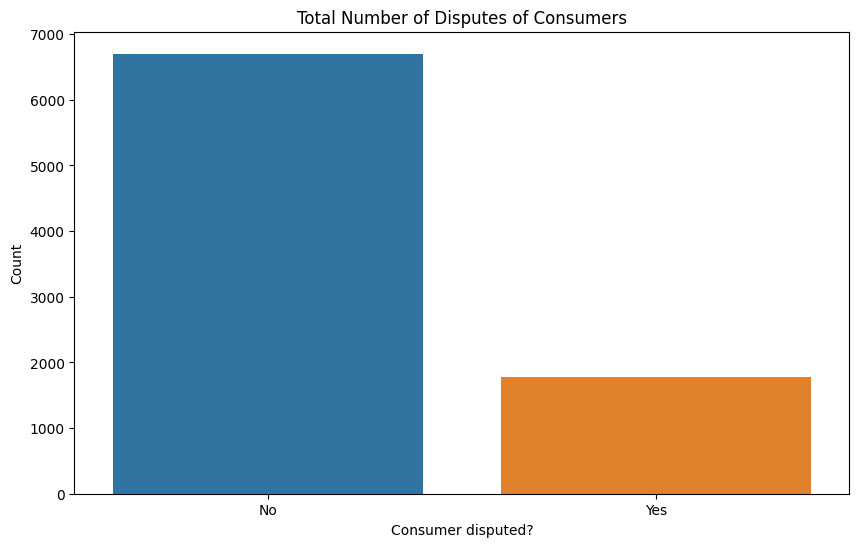

In [ ]:
# Plot bar graph of the total no of disputes of consumers with the help of seaborn
plt.figure(figsize=(10, 6))
sns.countplot(data=Train_Data, x='Consumer disputed?')
plt.title('Total Number of Disputes of Consumers')
plt.xlabel('Consumer disputed?')
plt.ylabel('Count')
plt.show()

Text(0, 0.5, 'Count')

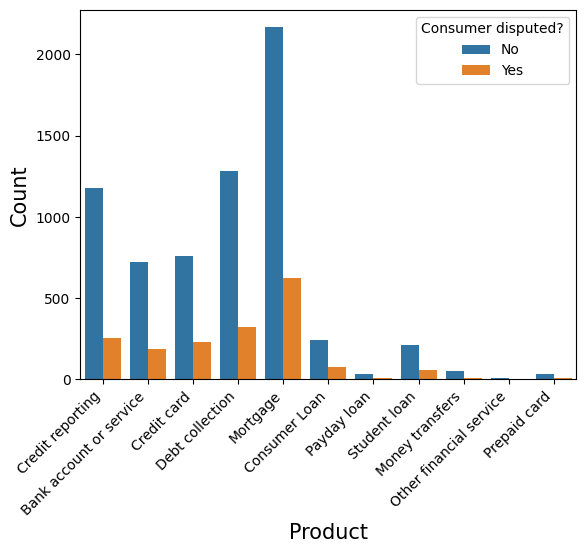

In [ ]:
# Plot bar graph of the total no of disputes products - wise with the help of seaborn
sns.countplot(x = 'Product', hue = 'Consumer disputed?', data = Train_Data)
plt.xticks(rotation = 45, fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Product', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

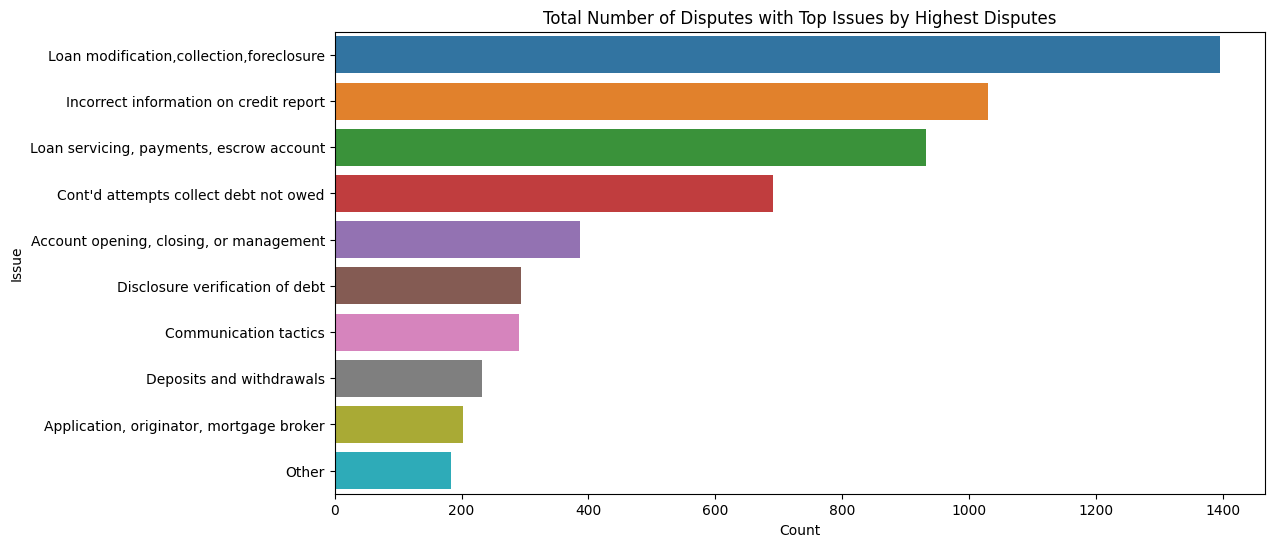

In [ ]:
#Plot bar graph of the total no of disputes with Top Issues by Highest Disputes, with the help of seaborn
plt.figure(figsize=(12, 6))
top_issues = Train_Data['Issue'].value_counts().nlargest(10)
sns.barplot(x=top_issues.values, y=top_issues.index)
plt.title('Total Number of Disputes with Top Issues by Highest Disputes')
plt.xlabel('Count')
plt.ylabel('Issue')
plt.show()

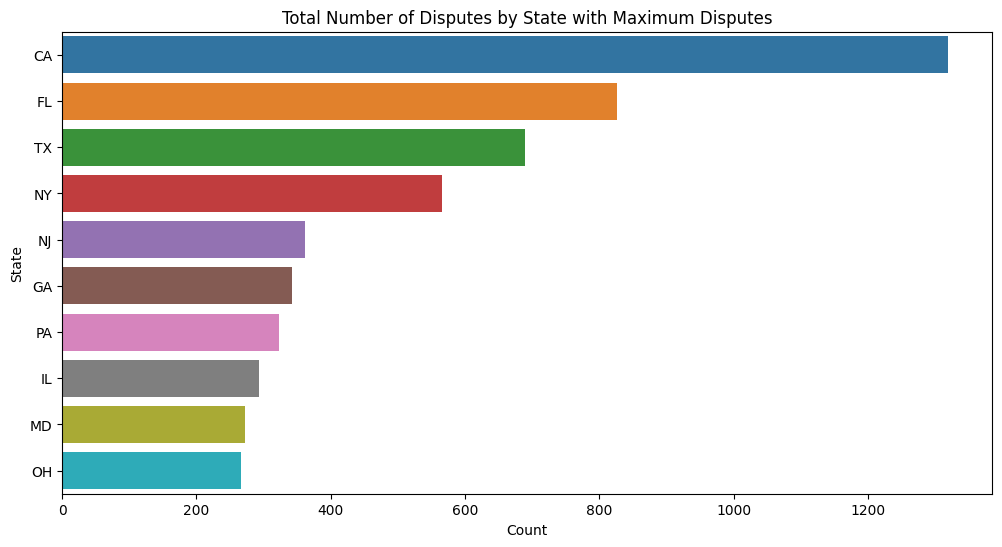

In [ ]:
# Bar graph of the total number of disputes by State with Maximum Disputes
plt.figure(figsize=(12, 6))
state_disputes = Train_Data['State'].value_counts().nlargest(10)
sns.barplot(x=state_disputes.values, y=state_disputes.index)
plt.title('Total Number of Disputes by State with Maximum Disputes')
plt.xlabel('Count')
plt.ylabel('State')
plt.show()

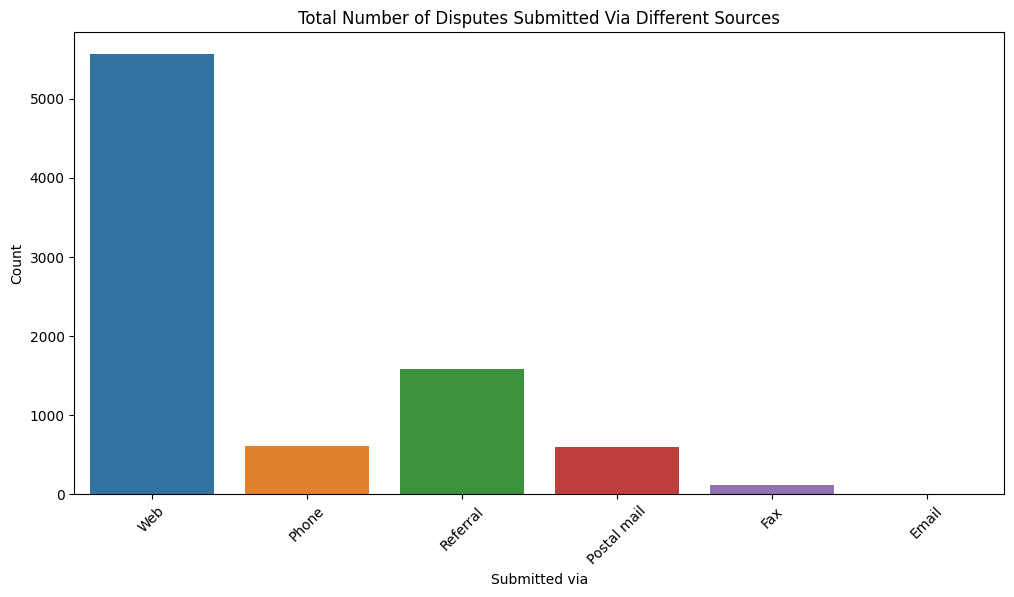

In [ ]:
# Bar graph of the total number of disputes submitted via different sources
plt.figure(figsize=(12, 6))
sns.countplot(data=Train_Data, x='Submitted via')
plt.title('Total Number of Disputes Submitted Via Different Sources')
plt.xlabel('Submitted via')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

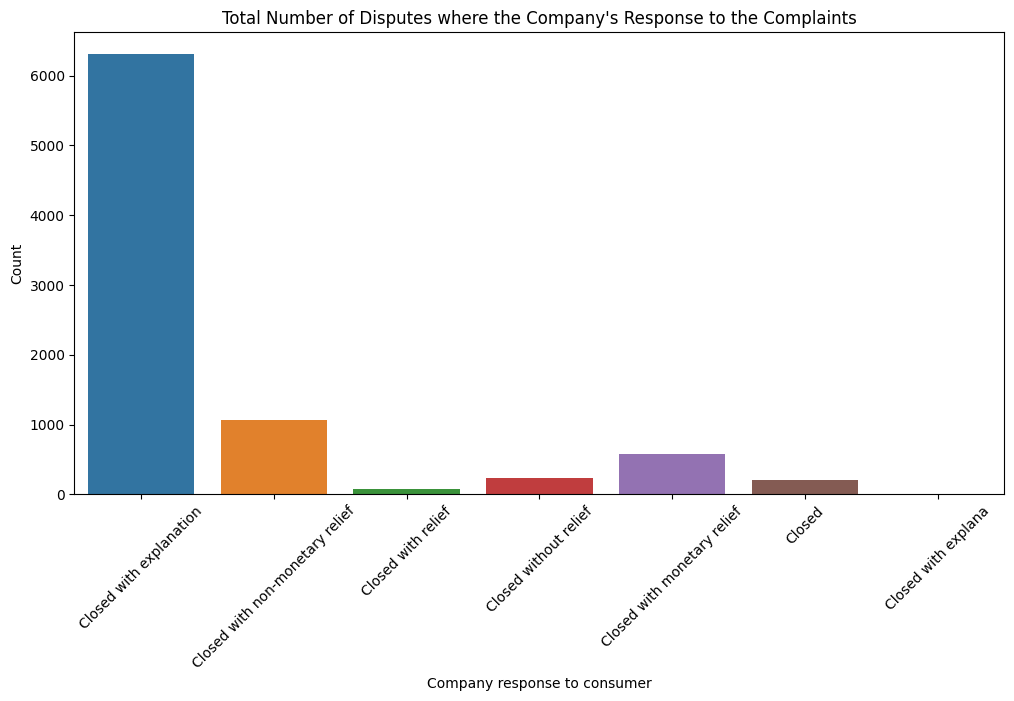

In [ ]:
# Bar graph of the total number of disputes where the Company's Response to the Complaints
plt.figure(figsize=(12, 6))
sns.countplot(data=Train_Data, x='Company response to consumer')
plt.title("Total Number of Disputes where the Company's Response to the Complaints")
plt.xlabel('Company response to consumer')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

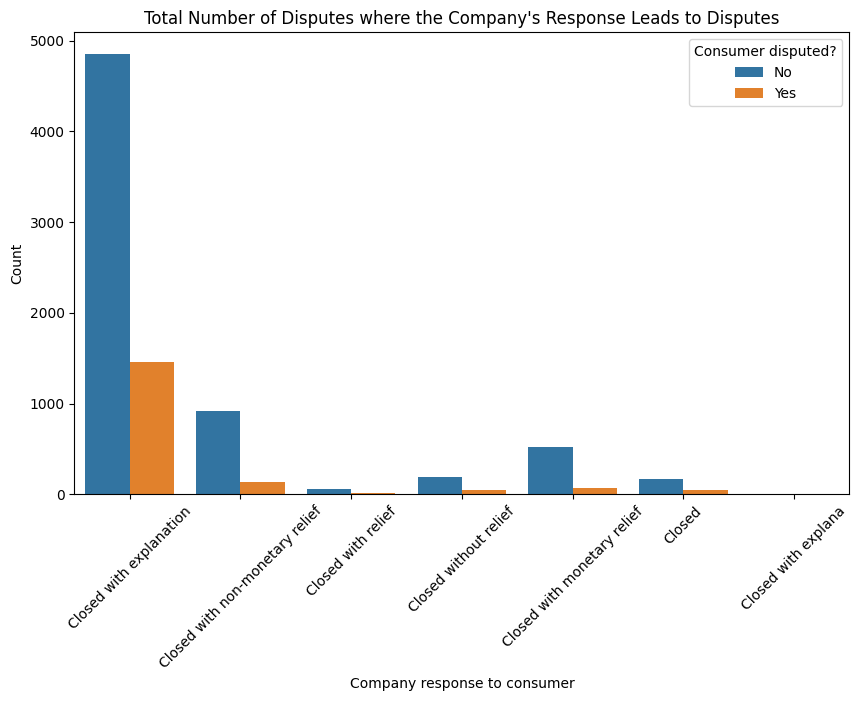

In [ ]:
# Bar graph of the total number of disputes where the Company's Response Leads to Disputes
plt.figure(figsize=(10, 6))
sns.countplot(data=Train_Data, x='Company response to consumer', hue='Consumer disputed?')
plt.title("Total Number of Disputes where the Company's Response Leads to Disputes")
plt.xlabel('Company response to consumer')
plt.ylabel('Count')
plt.legend(title='Consumer disputed?')
plt.xticks(rotation=45)
plt.show()

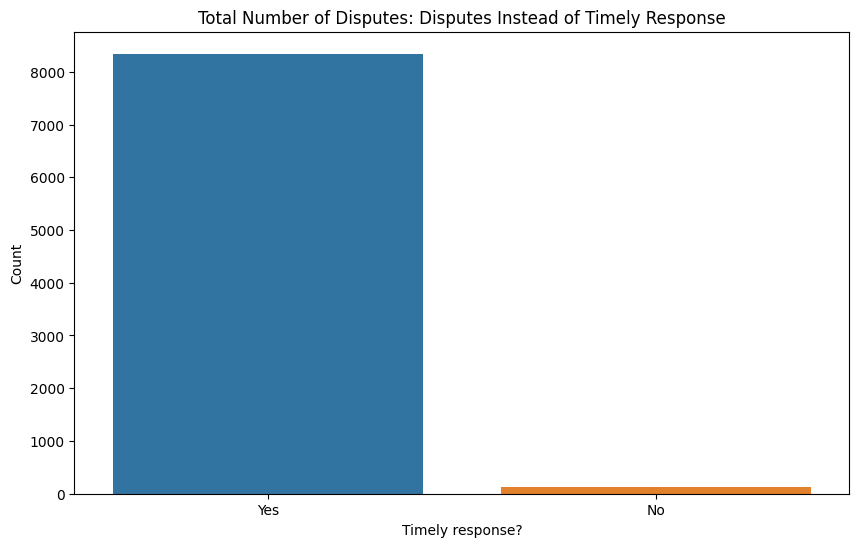

In [ ]:
# Bar graph of the total number of disputes: Whether there are Disputes Instead of Timely Response
plt.figure(figsize=(10, 6))
sns.countplot(data=Train_Data, x='Timely response?')
plt.title('Total Number of Disputes: Disputes Instead of Timely Response')
plt.xlabel('Timely response?')
plt.ylabel('Count')
plt.show()


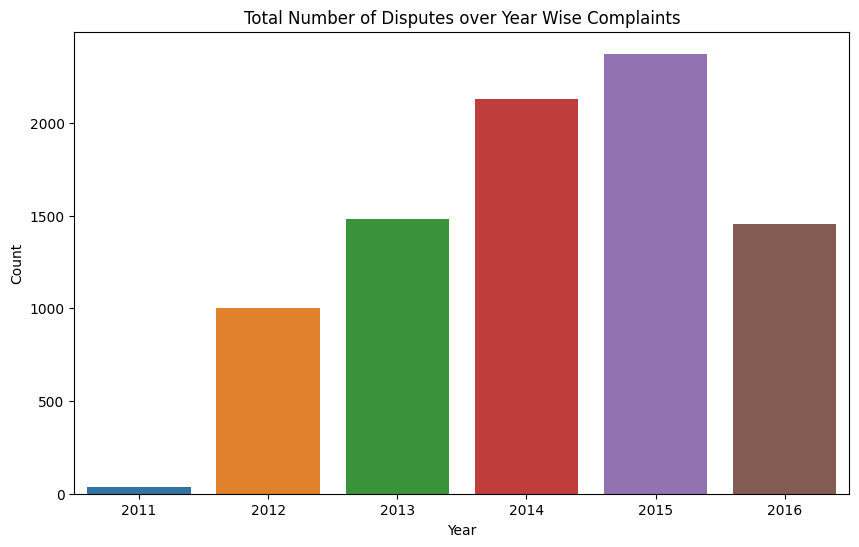

In [ ]:
# Bar graph of the total number of disputes over Year Wise Complaints
plt.figure(figsize=(10, 6))
year_complaints = Train_Data['Year'].value_counts().sort_index()
sns.barplot(x=year_complaints.index, y=year_complaints.values)
plt.title('Total Number of Disputes over Year Wise Complaints')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


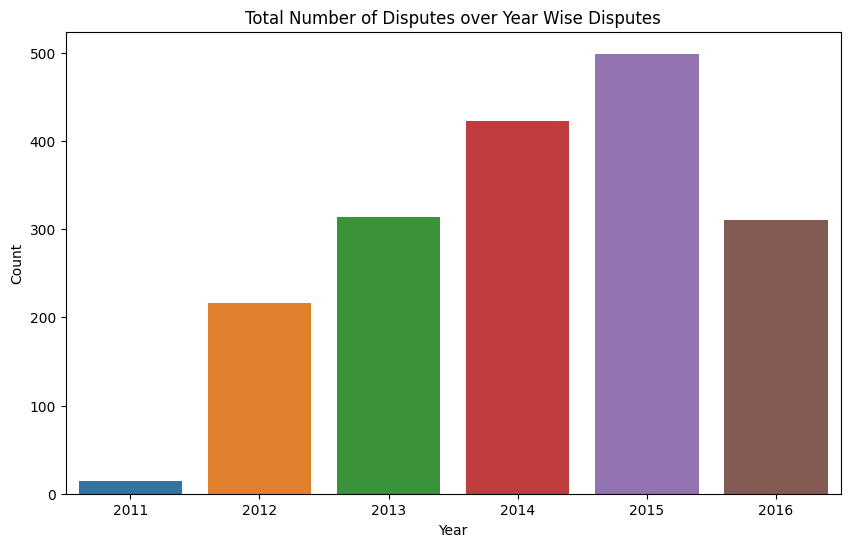

In [ ]:
# Bar graph of the total number of disputes over Year Wise Disputes
plt.figure(figsize=(10, 6))
year_disputes = Train_Data[Train_Data['Consumer disputed?'] == 'Yes']['Year'].value_counts().sort_index()
sns.barplot(x=year_disputes.index, y=year_disputes.values)
plt.title('Total Number of Disputes over Year Wise Disputes')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

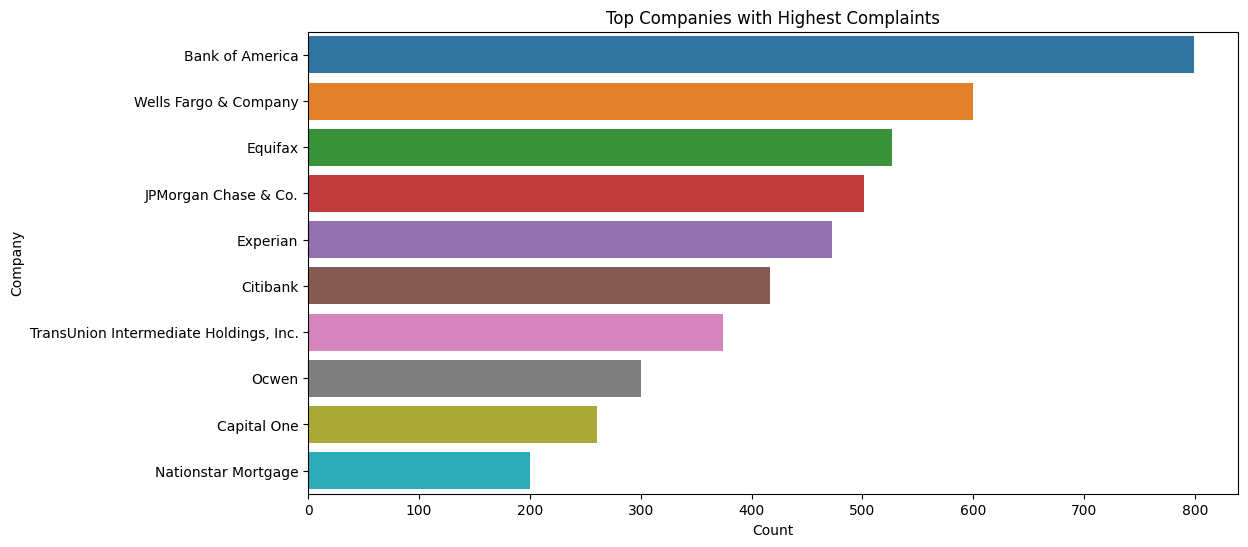

In [ ]:
# Bar graph of Top Companies with Highest Complaints
plt.figure(figsize=(12, 6))
top_companies = Train_Data['Company'].value_counts().nlargest(10)
sns.barplot(x=top_companies.values, y=top_companies.index)
plt.title('Top Companies with Highest Complaints')
plt.xlabel('Count')
plt.ylabel('Company')
plt.show()

In [ ]:
Train_Data.columns

Index(['Product', 'Issue', 'Company', 'State', 'Submitted via',
       'Company response to consumer', 'Timely response?',
       'Consumer disputed?', 'Day', 'Month', 'Year', 'Days Held',
       'Week_Received'],
      dtype='object')

In [ ]:
# Convert all negative days held to zero(it is the time taken by the authority that can't be negative)
Train_Data['Days Held'] = Train_Data['Days Held'].clip(lower=0)
Test_Data['Days Held'] = Test_Data['Days Held'].clip(lower=0)

In [ ]:
# Drop Unnecessary Columns for the Model Building like:'Company', 'State', 'Year_Received', 'Days_held'
Train_Data = Train_Data.drop(['Company', 'State', 'Year', 'Days Held'], axis=1)
Test_Data = Test_Data.drop(['Company', 'State', 'Year', 'Days Held'], axis=1)

In [ ]:
# Change Consumer Disputed column to 0 and 1
Train_Data['Consumer disputed?'] = np.where(Train_Data['Consumer disputed?'] == "Yes", 1, 0)

In [ ]:
# Create dummy variables for categorical features
categorical_columns = ['Product', 'Submitted via', 'Company response to consumer', 'Timely response?']
Train_Data = pd.get_dummies(Train_Data, columns=categorical_columns, drop_first=True)
Test_Data = pd.get_dummies(Test_Data, columns=categorical_columns, drop_first=True)


In [ ]:
Train_Data.columns

Index(['Issue', 'Consumer disputed?', 'Day', 'Month', 'Week_Received',
       'Product_Consumer Loan', 'Product_Credit card',
       'Product_Credit reporting', 'Product_Debt collection',
       'Product_Money transfers', 'Product_Mortgage',
       'Product_Other financial service', 'Product_Payday loan',
       'Product_Prepaid card', 'Product_Student loan', 'Submitted via_Fax',
       'Submitted via_Phone', 'Submitted via_Postal mail',
       'Submitted via_Referral', 'Submitted via_Web',
       'Company response to consumer_Closed with explana',
       'Company response to consumer_Closed with explanation',
       'Company response to consumer_Closed with monetary relief',
       'Company response to consumer_Closed with non-monetary relief',
       'Company response to consumer_Closed with relief',
       'Company response to consumer_Closed without relief',
       'Timely response?_Yes'],
      dtype='object')

In [ ]:
Train_Data=Train_Data.drop("Issue",axis=1)
Train_Data=Train_Data.drop("Day",axis=1)

In [ ]:
# Scaling the data sets (excluding the dependent variable)
scaler = StandardScaler()
X = Train_Data.drop('Consumer disputed?', axis=1)
X_scaled = scaler.fit_transform(X)

In [ ]:
Train_Data.shape

(8478, 25)

In [ ]:
# Perform feature selection with PCA
pca = PCA(n_components=0.8)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
# Split the data sets into X and Y
Y = Train_Data['Consumer disputed?']
X_train, X_val, Y_train, Y_val = train_test_split(X_pca, Y, test_size=0.2, random_state=42)

In [ ]:
models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier(), GradientBoostingClassifier(), KNeighborsClassifier(), XGBClassifier()]
model_names = ['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier', 'AdaBoostClassifier', 'GradientBoostingClassifier', 'KNeighborsClassifier', 'XGBClassifier']
accuracy_train = []
accuracy_val = []
for model in models:
    mod = model
    mod.fit(X_train, Y_train)
    y_pred_train = mod.predict(X_train)
    y_pred_val = mod.predict(X_val)
    accuracy_train.append(accuracy_score(Y_train, y_pred_train))
    accuracy_val.append(accuracy_score(Y_val, y_pred_val))
data = {'Modelling Algorithm' : model_names, 'Train Accuracy' : accuracy_train, 'Validation Accuracy' : accuracy_val}
data = pd.DataFrame(data)
data['Difference'] = ((np.abs(data['Train Accuracy'] - data['Validation Accuracy'])) * 100)/(data['Train Accuracy'])
data.sort_values(by = 'Validation Accuracy', ascending = False)

,Modelling Algorithm,Train Accuracy,Validation Accuracy,Difference
4,GradientBoostingClassifier,0.795636,0.783608,1.511624
0,LogisticRegression,0.792392,0.783019,1.182844
3,AdaBoostClassifier,0.793129,0.782429,1.349040
6,XGBClassifier,0.805662,0.775354,3.761909
2,RandomForestClassifier,0.806252,0.770047,4.490492
1,DecisionTreeClassifier,0.806252,0.768868,4.636754
5,KNeighborsClassifier,0.759805,0.731132,3.773768
